In [1]:
from IPython.display import display
import pandas as pd                 
import numpy as np  #for mathematical calculation
import seaborn as sns   #for data visualization
import matplotlib.pyplot as plt # for plotting graphs
import missingno as msno
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_dataset = pd.read_csv('dataset_loan.csv')

In [3]:
#Properties of the Data set
#Shape and Dimensions
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Y    422
N    192
Name: Loan_Status, dtype: int64

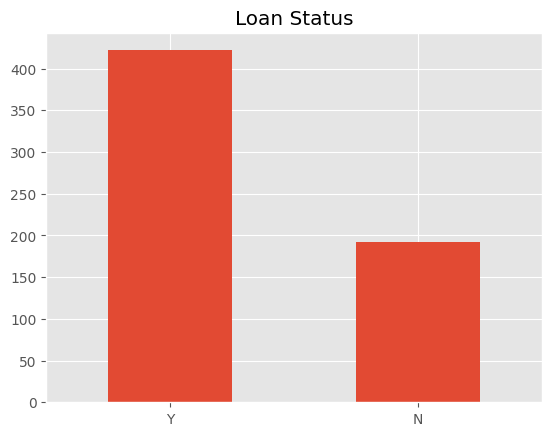

In [4]:
#Visual representation of those who got loans and those who havent 
plt.style.use('ggplot')
loan_dataset['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(loan_dataset['Loan_Status'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64

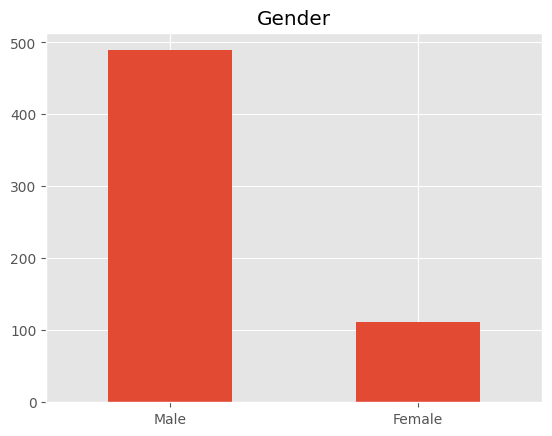

In [5]:
#Visualizing the predictor variables
#Visual representation of those who got loans and those who havent
#1. Gender
plt.style.use('ggplot')
loan_dataset['Gender'].value_counts().plot.bar(title='Gender',rot=0)
display(loan_dataset['Gender'].value_counts())


Yes    398
No     213
Name: Married, dtype: int64

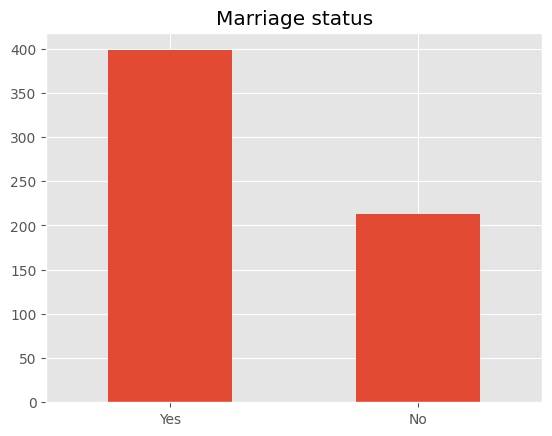

In [6]:
#2. Marriage status
plt.style.use('ggplot')
loan_dataset['Married'].value_counts().plot.bar(title='Marriage status',rot=0)
display(loan_dataset['Married'].value_counts())


No     500
Yes     82
Name: Self_Employed, dtype: int64

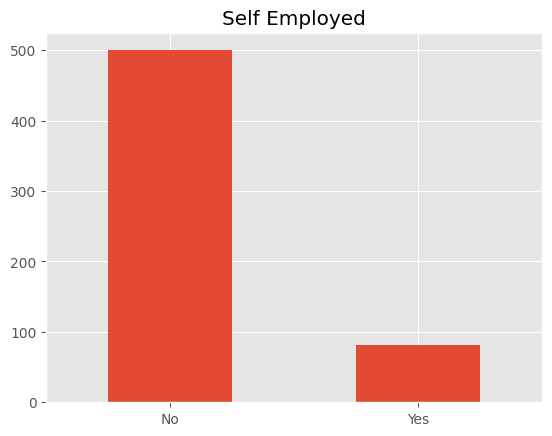

In [7]:
#3. Self-Employment
plt.style.use('ggplot')
loan_dataset['Self_Employed'].value_counts().plot.bar(title='Self Employed',rot=0)
display(loan_dataset['Self_Employed'].value_counts())


1.0    475
0.0     89
Name: Credit_History, dtype: int64

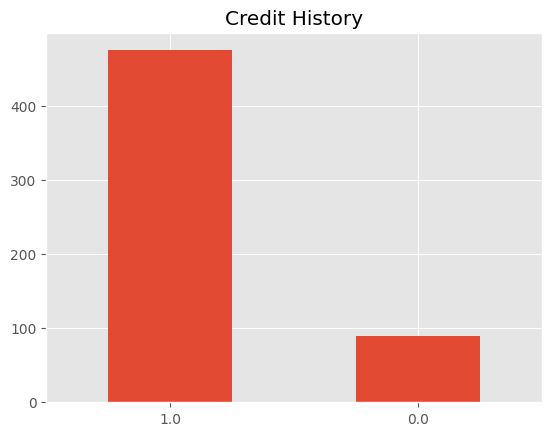

In [8]:
#4. Credit History
# 1.0 is yes and 0 is No
plt.style.use('ggplot')
loan_dataset['Credit_History'].value_counts().plot.bar(title='Credit History',rot=0)
display(loan_dataset['Credit_History'].value_counts())


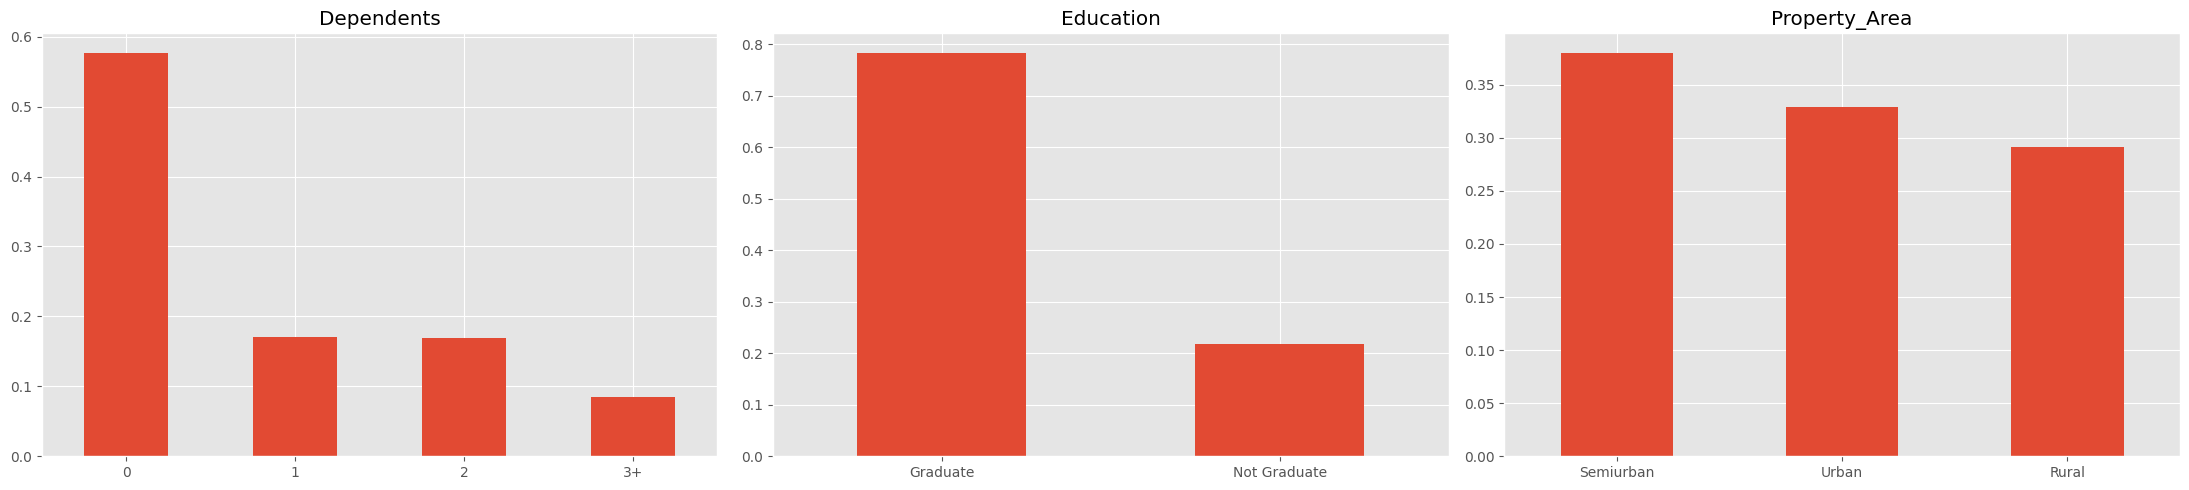

In [9]:
# Dependent variables

fig2, ax2= plt.subplots(1,3)

loan_dataset['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)

loan_dataset['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)

loan_dataset['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property_Area',rot=0)

fig2.tight_layout()

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

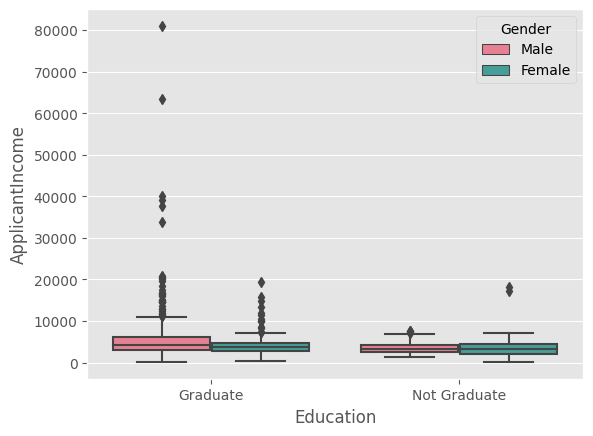

In [10]:
#The Applicant's income in comparison to both their Gender,and Level of education 
sns.boxplot(x = loan_dataset['Education'],
            y = loan_dataset['ApplicantIncome'],
            hue = loan_dataset['Gender'],
            palette='husl')

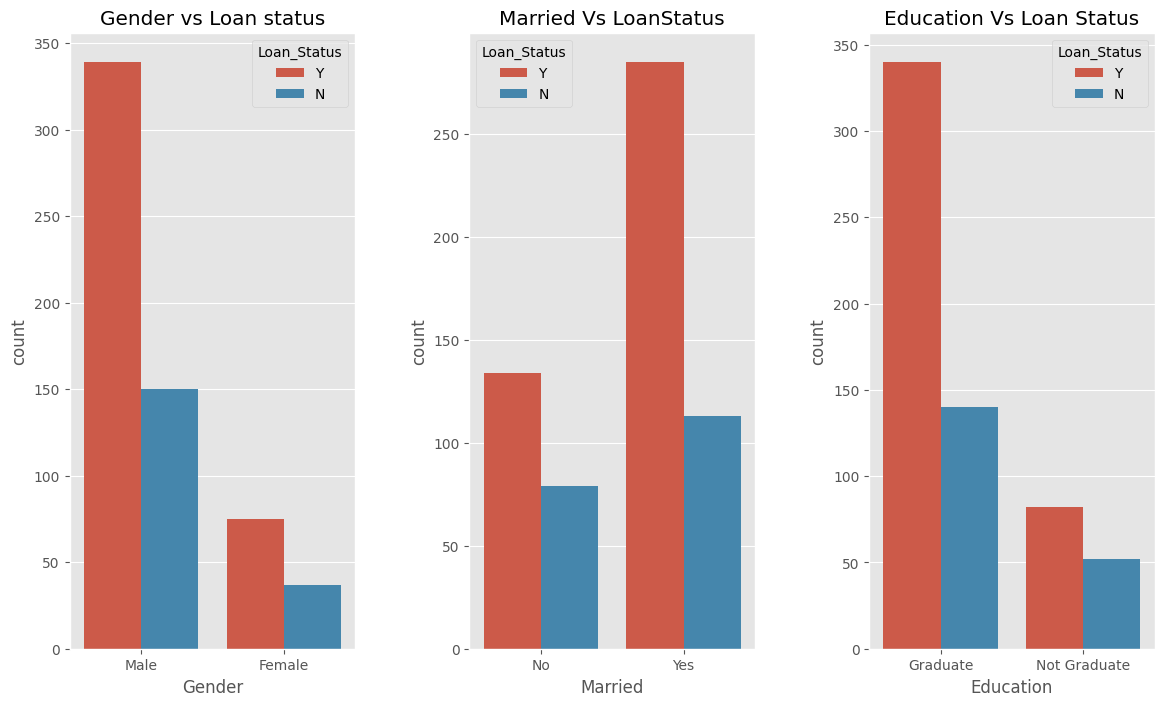

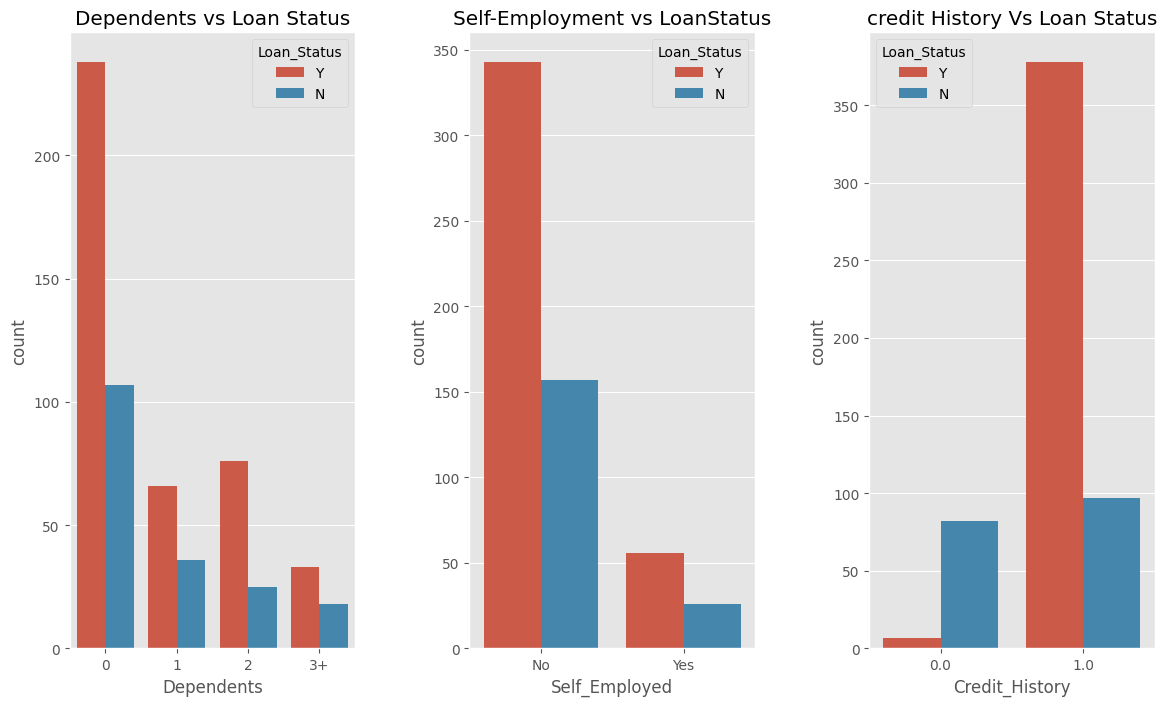

In [11]:
#Categorical Independent vs Target Variables 
fig, axs = plt.subplots(ncols=3, figsize=(14, 8))
sns.countplot(x=loan_dataset['Gender'], hue=loan_dataset['Loan_Status'], ax=axs[0])
axs[0].set_title('Gender vs Loan status')
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset, ax=axs[1])
axs[1].set_title('Married Vs LoanStatus')
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset, ax=axs[2])
axs[2].set_title('Education Vs Loan Status')
fig.subplots_adjust(wspace=0.4)
plt.show()

fig, axs = plt.subplots(ncols=3, figsize=(14, 8))
sns.countplot(x=loan_dataset['Dependents'], hue=loan_dataset['Loan_Status'], ax=axs[0])
axs[0].set_title('Dependents vs Loan Status')
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_dataset, ax=axs[1])
axs[1].set_title('Self-Employment vs LoanStatus')
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_dataset, ax=axs[2])
axs[2].set_title('credit History Vs Loan Status')
fig.subplots_adjust(wspace=0.4)
plt.show()




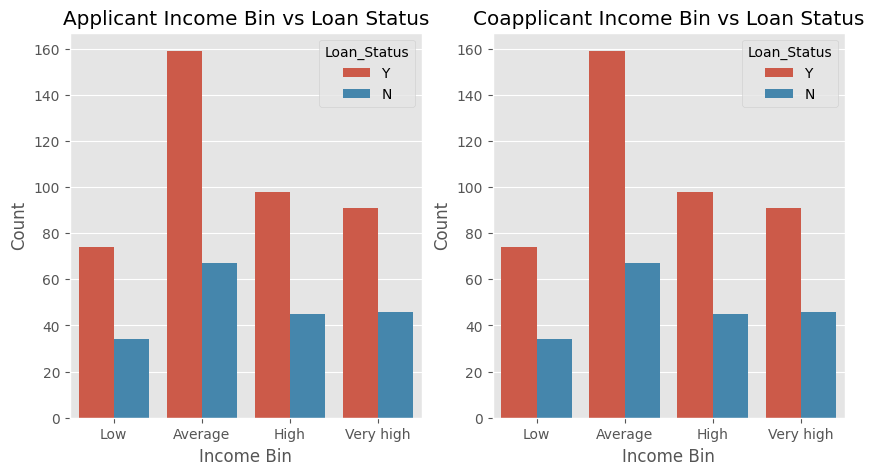

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
#1 - Applicant's income vs current loan status 
bins= [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very high']
loan_dataset['Income_bin']=pd.cut(loan_dataset['ApplicantIncome'],bins,labels=group)
sns.countplot(x='Income_bin', hue='Loan_Status', data=loan_dataset, ax=axs[0])
axs[0].set_title('Applicant Income Bin vs Loan Status')
axs[0].set_xlabel('Income Bin')
axs[0].set_ylabel('Count')
#1 - Co-Applicant's income vs current loan status 
bins= [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very high']
loan_dataset['Coapplicant_Income_bin']=pd.cut(loan_dataset['CoapplicantIncome'],bins,labels=group)
sns.countplot(x='Income_bin', hue='Loan_Status', data=loan_dataset, ax=axs[1])
axs[1].set_title('Coapplicant Income Bin vs Loan Status')
axs[1].set_xlabel('Income Bin')
axs[1].set_ylabel('Count')

plt.show()


In [13]:
#Hypotheses Testing based on key assumptions above
def test_hypothesis(cat_var, target_var, alpha=0.05):
    # contingency table
    contingency_table = pd.crosstab(loan_dataset[cat_var], loan_dataset[target_var])
    print('contingency_table :-\n', contingency_table)

    # chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print('Observed Values :-\n', contingency_table.values)
    print('Expected Values :-\n', expected)

    # critical value
    critical_value = stats.chi2.ppf(q=1-alpha, df=dof)
    print('Degree of Freedom:-', dof)
    print('chi-square statistic:-', chi2)
    print('critical_value:', critical_value)
    print('p-value:', p)
    print('Significance level: ', alpha)
    print('Degree of Freedom: ', dof)

    # conclusion
    if chi2 < critical_value and p > alpha:
        print('Retain H0,There\'s no relationship between 2 categorical variables as Chi_square is < critical_value &')
        print('Retain H0,as p-value > alpha')
    else:
        print('Reject H0,There\'s a relationship between 2 categorical variables as Chi_square is >= critical_value &')
        print('Reject H0 as p-value <= alpha')
 

In [14]:
#We know the chance of getting a loan for both male and female is equal; hence we 
#expect the analysis to preserve H0
test_hypothesis('Gender', 'Loan_Status')

contingency_table :-
 Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Observed Values :-
 [[ 37  75]
 [150 339]]
Expected Values :-
 [[ 34.84858569  77.15141431]
 [152.15141431 336.84858569]]
Degree of Freedom:- 1
chi-square statistic:- 0.13962612116543877
critical_value: 3.841458820694124
p-value: 0.7086529816451106
Significance level:  0.05
Degree of Freedom:  1
Retain H0,There's no relationship between 2 categorical variables as Chi_square is < critical_value &
Retain H0,as p-value > alpha


In [15]:
test_hypothesis('Property_Area', 'Loan_Status')
#Our results below indicate that indeed, he conditional probability of getting a loan is not equal across different property area

contingency_table :-
 Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Observed Values :-
 [[ 69 110]
 [ 54 179]
 [ 69 133]]
Expected Values :-
 [[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]
Degree of Freedom:- 2
chi-square statistic:- 12.297623130485675
critical_value: 5.991464547107979
p-value: 0.0021360187811644937
Significance level:  0.05
Degree of Freedom:  2
Reject H0,There's a relationship between 2 categorical variables as Chi_square is >= critical_value &
Reject H0 as p-value <= alpha


In [16]:
test_hypothesis('Credit_History', 'Loan_Status')
#With p value < 0.05, we can reject null hypothesis and conclude that the chances are not equal
# The chi2 statistics is 174.6, which means the difference between the 2 groups of credit_history is lot

contingency_table :-
 Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
Observed Values :-
 [[ 82   7]
 [ 97 378]]
Expected Values :-
 [[ 28.2464539  60.7535461]
 [150.7535461 324.2464539]]
Degree of Freedom:- 1
chi-square statistic:- 174.63729658142535
critical_value: 3.841458820694124
p-value: 7.184759548750746e-40
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There's a relationship between 2 categorical variables as Chi_square is >= critical_value &
Reject H0 as p-value <= alpha


In [17]:
test_hypothesis('Credit_History', 'Loan_Status')
#With p value < 0.05, we can reject null hypothesis and conclude that the chances are not equal
# The chi2 statistics is 177.9, which means the difference between the 

contingency_table :-
 Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
Observed Values :-
 [[ 82   7]
 [ 97 378]]
Expected Values :-
 [[ 28.2464539  60.7535461]
 [150.7535461 324.2464539]]
Degree of Freedom:- 1
chi-square statistic:- 174.63729658142535
critical_value: 3.841458820694124
p-value: 7.184759548750746e-40
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There's a relationship between 2 categorical variables as Chi_square is >= critical_value &
Reject H0 as p-value <= alpha


In [18]:
test_hypothesis('Education', 'Loan_Status')
#Although p value = 0.03 which is slightly less than 0.05, 
#it is enough to reject null hypothesis and conclude that their chances are not equal. 

contingency_table :-
 Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Observed Values :-
 [[140 340]
 [ 52  82]]
Expected Values :-
 [[150.09771987 329.90228013]
 [ 41.90228013  92.09771987]]
Degree of Freedom:- 1
chi-square statistic:- 4.091490413303621
critical_value: 3.841458820694124
p-value: 0.04309962129357355
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There's a relationship between 2 categorical variables as Chi_square is >= critical_value &
Reject H0 as p-value <= alpha


In [19]:
test_hypothesis('Dependents', 'Loan_Status')

#With p value > 0.05, we fail to reject the null hypothesis
#There is no difference in chances of getting a loan based on number of dependent

contingency_table :-
 Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
Observed Values :-
 [[107 238]
 [ 36  66]
 [ 25  76]
 [ 18  33]]
Expected Values :-
 [[107.12854758 237.87145242]
 [ 31.67278798  70.32721202]
 [ 31.36227045  69.63772955]
 [ 15.83639399  35.16360601]]
Degree of Freedom:- 3
chi-square statistic:- 3.158339770698263
critical_value: 7.814727903251179
p-value: 0.3678506740863211
Significance level:  0.05
Degree of Freedom:  3
Retain H0,There's no relationship between 2 categorical variables as Chi_square is < critical_value &
Retain H0,as p-value > alpha


In [20]:
test_hypothesis('Self_Employed', 'Loan_Status')
#With p value > 0.05, we fail to reject null hypotheseis.

contingency_table :-
 Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
Observed Values :-
 [[157 343]
 [ 26  56]]
Expected Values :-
 [[157.21649485 342.78350515]
 [ 25.78350515  56.21649485]]
Degree of Freedom:- 1
chi-square statistic:- 0.0
critical_value: 3.841458820694124
p-value: 1.0
Significance level:  0.05
Degree of Freedom:  1
Retain H0,There's no relationship between 2 categorical variables as Chi_square is < critical_value &
Retain H0,as p-value > alpha


In [21]:
test_hypothesis('Married', 'Loan_Status')
#With p value < 0.05, we reject the null hypothesis
# We conclude that there is a difference in getting a loan between the married and unmarried customers

contingency_table :-
 Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
Observed Values :-
 [[ 79 134]
 [113 285]]
Expected Values :-
 [[ 66.93289689 146.06710311]
 [125.06710311 272.93289689]]
Degree of Freedom:- 1
chi-square statistic:- 4.475019348315097
critical_value: 3.841458820694124
p-value: 0.03439381301579988
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There's a relationship between 2 categorical variables as Chi_square is >= critical_value &
Reject H0 as p-value <= alpha


In [22]:
#Data Cleaning

loan_dataset=loan_dataset.drop(['Loan_ID', 'Coapplicant_Income_bin'],axis=1)

loan_dataset['Dependents'].replace('3+',3,inplace=True)
loan_dataset['Loan_Status'].replace('N',0, inplace=True)
loan_dataset['Loan_Status'].replace('Y',1,inplace=True)

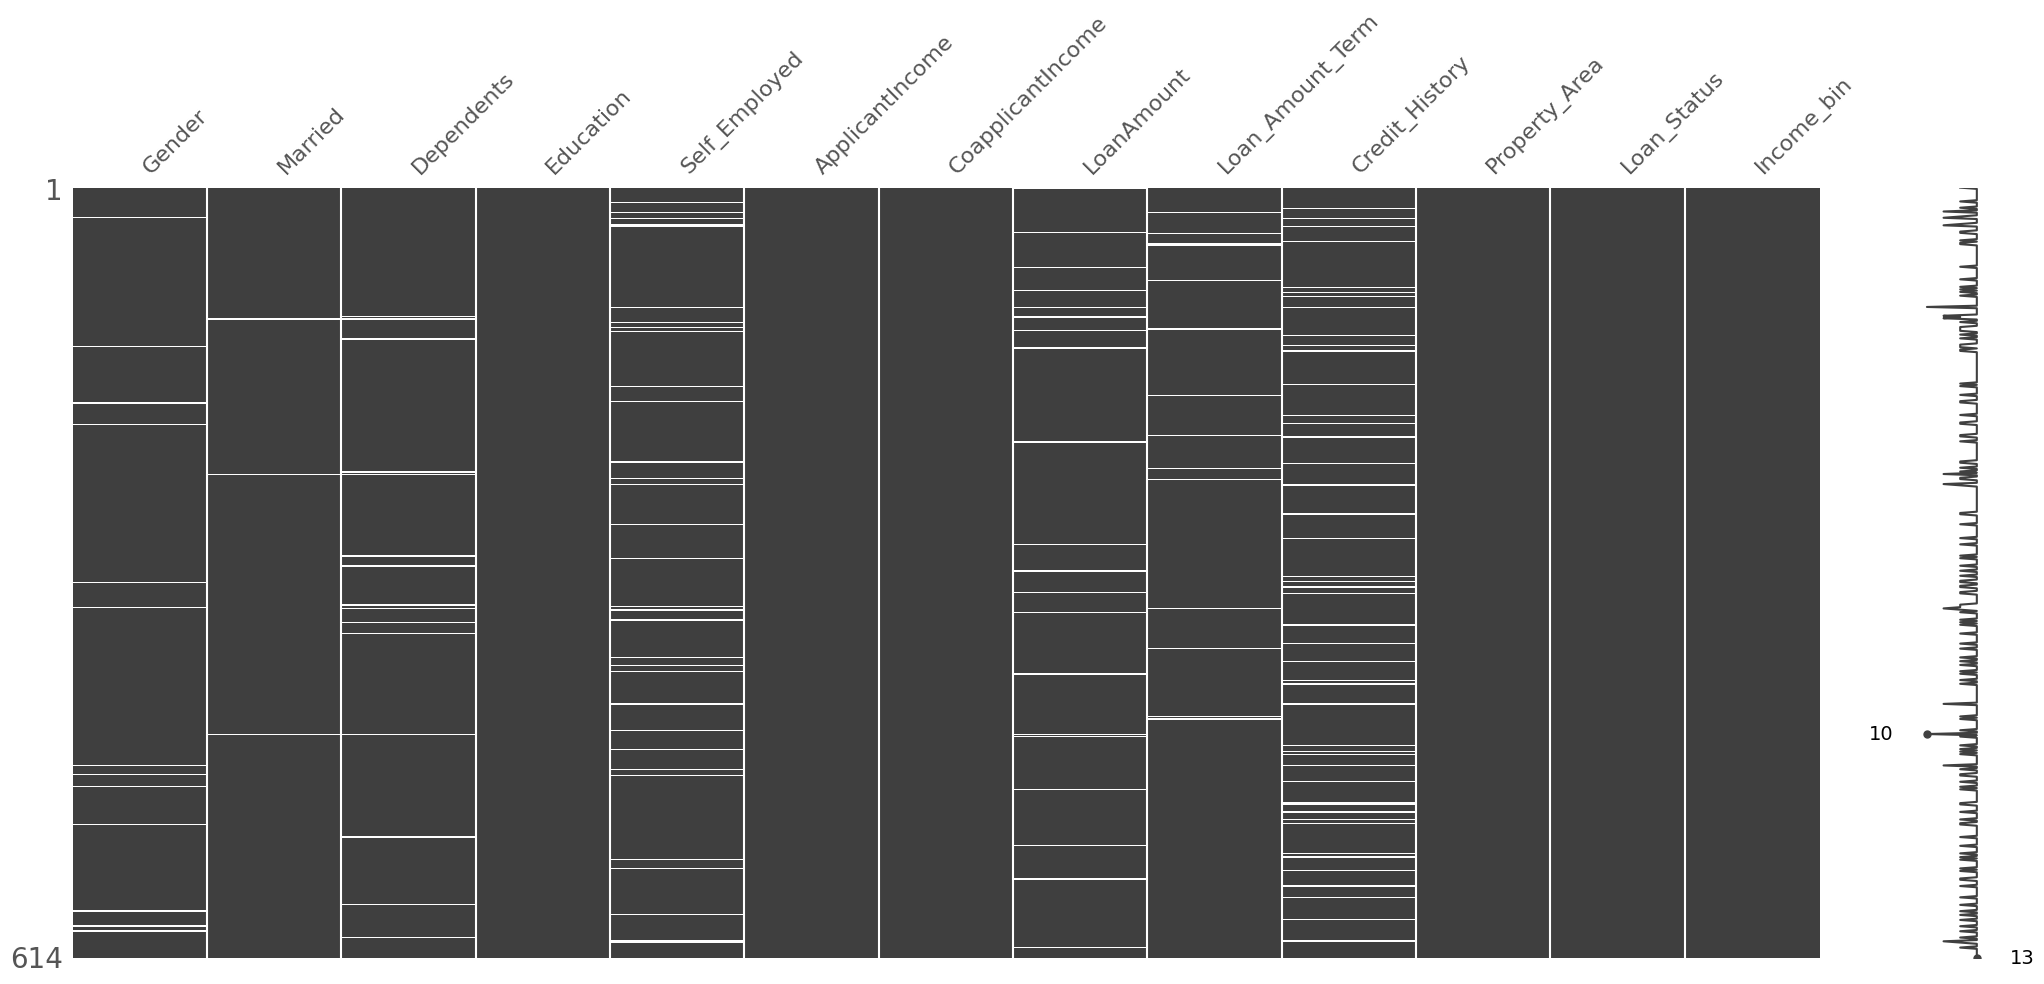

In [23]:
msno.matrix(loan_dataset)
plt.show()

In [24]:
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0], inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0], inplace=True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0], inplace=True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0], inplace=True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0], inplace=True)

loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0], inplace=True)
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(), inplace=True)

In [25]:
loan_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
dtype: int64

In [26]:
matrix= loan_dataset.corr() 
print(loan_dataset.head())
Catos = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for cato in Catos:
    loan_dataset[cato] = loan_dataset[cato].astype('category').cat.codes

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  Loan_Status Income_bin  
0         Urban            1       High  
1         Rural            0       Hig

In [27]:
#Finding the null values 
loan_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
dtype: int64

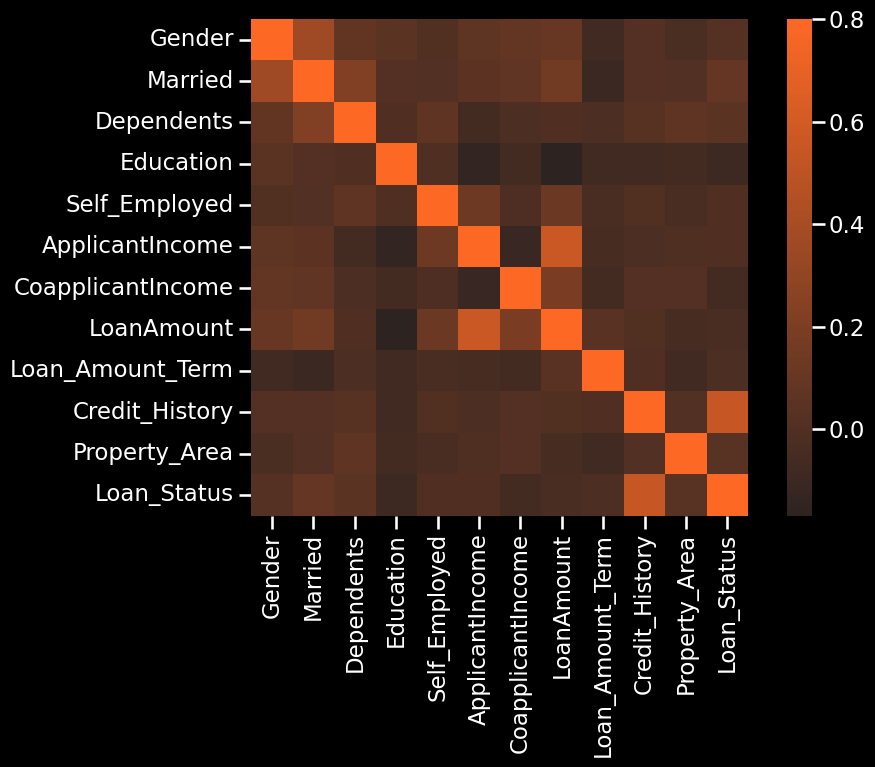

In [28]:

#Visualizing correlation using a heatmap
#More dark means more correlation
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
matrix= loan_dataset.corr() 
fig, ax = plt.subplots(figsize=(9,6))
cmap = sns.dark_palette("#fd6925", as_cmap=True)
fig.tight_layout()
HeatM = sns.heatmap(matrix,vmax=.8,square=True, cmap=cmap)
plt.rcParams['figure.figsize']=(10,10)
fig = HeatM.get_figure()
fig.savefig('output.png', transparent=True)

In [31]:
#We see a 56% correlation between Loan Amount and Applicant income 
np.corrcoef(loan_dataset['LoanAmount'], loan_dataset['ApplicantIncome'])

array([[1.        , 0.56518052],
       [0.56518052, 1.        ]])

In [32]:
#We see an 19% correlation between Loan Amount and Coapplicant income 
np.corrcoef(loan_dataset['LoanAmount'], loan_dataset['CoapplicantIncome'])

array([[1.        , 0.18921778],
       [0.18921778, 1.        ]])

<Axes: >

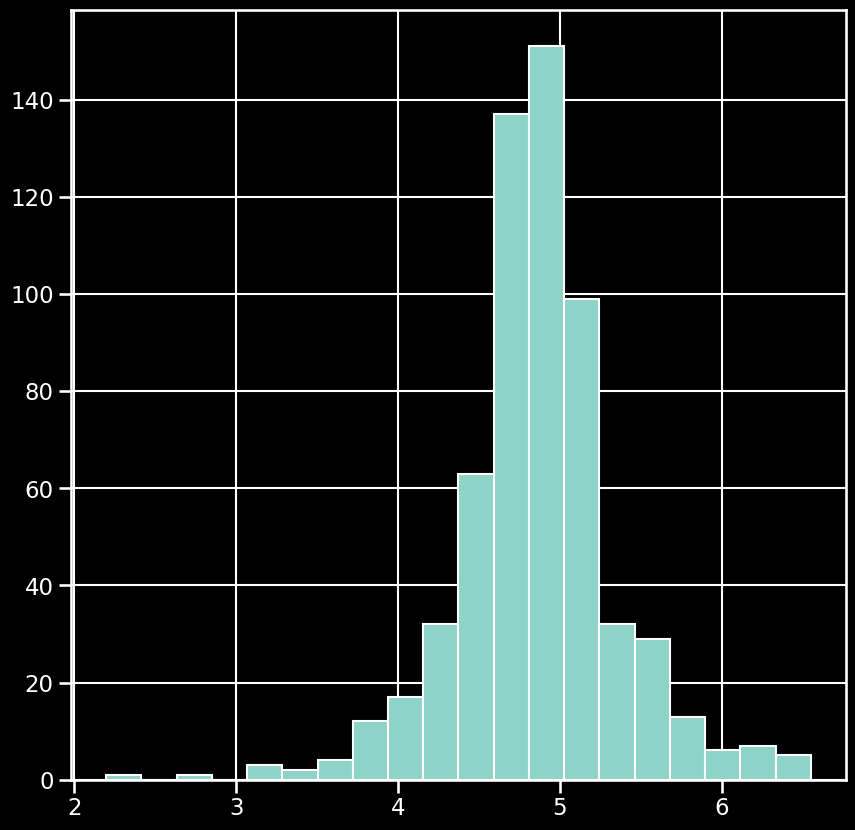

In [33]:
#Outlier Treatment
#y is the variable we are trying to determine
#Due to outliers in the Loan Amount. the data in the loan amount is skewed towards the right, which means bulk of the data is towards the left. We remove this skewness by doing a log transformation. A log transformation doesn't effect affect the smaller values much but reduces the larger values. So the distribution becomes normal

y=loan_dataset.Loan_Status
Loan_data_V1=loan_dataset.drop('Loan_Status',1)
loan_dataset['LoanAmount_log']=np.log(loan_dataset['LoanAmount'])
loan_dataset['LoanAmount_log'].hist(bins=20)


In [34]:
#Dummy variables for categorical variables

Loan_data_V1=pd.get_dummies(Loan_data_V1)
loan_dataset=pd.get_dummies(loan_dataset)


In [35]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.Logit(y,Loan_data_V1 )
result=model1.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464602
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      599
Method:                           MLE   Df Model:                           14
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.2521
Time:                        14:28:11   Log-Likelihood:                -285.27
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 1.988e-33
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.0718      0.291     -0.247      0.805      -0.641       0.498

In [45]:
#Odds ratio: 
#We see a stronger corelation between Credit history and loan_status at 48

logit_model = sm.Logit(y, Loan_data_V1)
result = logit_model.fit()
odds_ratios = result.params.apply(lambda x: round(np.exp(x), 6))
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.464602
         Iterations 6
Gender                   0.930685
Married                  1.807783
Dependents               1.035279
Education                0.633206
Self_Employed            1.101804
ApplicantIncome          1.000024
CoapplicantIncome        0.999939
LoanAmount               0.998828
Loan_Amount_Term         0.999169
Credit_History          48.751030
Property_Area            1.085520
Income_bin_Low           0.096995
Income_bin_Average       0.106172
Income_bin_High          0.076405
Income_bin_Very high     0.058710
dtype: float64


In [47]:
#Model predictions --> 81% Accuracy already
predicted_1 = result.predict(Loan_data_V1)
accuracy_score(y, predicted_1.round())

0.8127035830618893

Creating New Models

As we can see p value for only credit history is less than 0.05. Hence we will remove all other independent variables and create new model and check its accuracy

In [48]:
Loan_data_V2 = loan_dataset.filter(['Credit_History'], axis=1)
Loan_data_V2=pd.get_dummies(Loan_data_V2)

In [49]:
model2=sm.Logit(y,Loan_data_V2 )

result2=model2.fit()

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.539390
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            0
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.1318
Time:                        14:41:22   Log-Likelihood:                -331.19
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History     1.3278      0.107     12.381      0.000       1.118       1.538


In [54]:
#Odd ratios
#Deeper Understranding of the logistic regression
model_V2=LogisticRegression()
model_V2.fit(Loan_data_V2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V2.coef_).T).tolist(),'variable':Loan_data_V2.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
0,27.69363,Credit_History


In [55]:
#Higher odds ratio indicating strong association
predicted_2 = model_V2.predict(Loan_data_V2)
accuracy_score(y,predicted_2)

0.8094462540716613

In [56]:
#Creating Third model

#While finding correlation between independent variables, 
#we found that applicant income and loan amount have good correlation so 
#I will remove one of the variables from the data and then create a model.
Loan_data_V3 = Loan_data_V1.drop(['ApplicantIncome'], axis=1)
Loan_data_V3 =pd.get_dummies(Loan_data_V3)

In [57]:
model3=sm.Logit(y,Loan_data_V3 )

result3=model3.fit()

print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.465379
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      600
Method:                           MLE   Df Model:                           13
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.2509
Time:                        14:47:53   Log-Likelihood:                -285.74
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 7.909e-34
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.0732      0.290     -0.252      0.801      -0.642       0.496

In [59]:
model_V3=LogisticRegression()
model_V3.fit(Loan_data_V3,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V3.coef_).T).tolist(),'variable':Loan_data_V3.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
8,23.187391,Credit_History
1,1.521561,Married
10,1.107669,Income_bin_Low
11,1.073474,Income_bin_Average
2,1.022288,Dependents
4,1.015572,Self_Employed
5,0.999931,CoapplicantIncome
6,0.998721,LoanAmount
7,0.995727,Loan_Amount_Term
9,0.959827,Property_Area


In [60]:
predicted_3 = model_V3.predict(Loan_data_V3)
accuracy_score(y,predicted_3)

0.8094462540716613

In [61]:
#Creating Fourth model with two columns 
#credit history and coapplicant income
Loan_data_V4 = loan_dataset.filter(['Credit_History', 'CoapplicantIncome'], axis=1)
Loan_data_V4=pd.get_dummies(Loan_data_V4)

In [62]:
model4=sm.Logit(y,Loan_data_V4 )

result4=model4.fit()

print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.530149
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.1466
Time:                        14:49:26   Log-Likelihood:                -325.51
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 3.818e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Credit_History        1.5175      0.126     12.004      0.000       1.270       1.765
Coapplic

In [64]:
model_V4 = LogisticRegression()
model_V4.fit(Loan_data_V4,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V4.coef_).T).tolist(),'variable':Loan_data_V4.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
0,28.048905,Credit_History
1,0.999948,CoapplicantIncome


In [65]:
predicted_4 = model_V4.predict(Loan_data_V4)
accuracy_score(y,predicted_4)

0.8127035830618893

In [ ]:
#Fourth model has the max accuracy of 81.2%
#Testing the model by splitting data into 70% for train and 30 % for test.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Loan_data_V4, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [67]:
#Accuracy of the logistic regression model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [70]:
#XGBOOST
#You can test by changing loan_data_v1 - v4
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(Loan_data_V4,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = Loan_data_V4.loc[train_index],Loan_data_V4.loc[test_index] 
 ytr,yvl = y[train_index],y[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7704918032786885

 Mean Validation Accuracy 0.7947487671598028


In [71]:
#Decision Tree --> Accuracy should be lesser?
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(Loan_data_V4,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = Loan_data_V4.loc[train_index],Loan_data_V4.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7073170731707317

2 of kfold 5 
accuracy_score 0.7967479674796748

3 of kfold 5 
accuracy_score 0.7560975609756098

4 of kfold 5 
accuracy_score 0.7723577235772358

5 of kfold 5 
accuracy_score 0.7049180327868853

 Mean Validation Accuracy 0.7474876715980274


In [73]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(Loan_data_V4,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = Loan_data_V4.loc[train_index],Loan_data_V4.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7560975609756098

2 of kfold 5 
accuracy_score 0.8130081300813008

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.7804878048780488

5 of kfold 5 
accuracy_score 0.7704918032786885

 Mean Validation Accuracy 0.7833666533386646


In [75]:
#Grid Search
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(Loan_data_V4,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(Loan_data_V4,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = Loan_data_V4.loc[train_index],Loan_data_V4.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8292682926829268

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.8130081300813008

5 of kfold 5 
accuracy_score 0.8032786885245902

 Mean Validation Accuracy 0.8110622417699587
